In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine
from vnpy.app.cta_strategy.strategies.atr_rsi_strategy import (
    AtrRsiStrategy,
)
from datetime import datetime

In [2]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="XBTUSD.BITMEX",
    interval="1m",
    start=datetime(2013, 1, 1),
    end=datetime(2019, 4, 30),
    rate=3.0/10000,
    slippage=0.2,
    size=300,
    pricetick=0.2,
    capital=1_000_000,
)

2019-03-27 11:54:16.262535	开始加载历史数据
2019-03-27 11:54:30.753671	历史数据加载完成，数据量：147566
2019-03-27 11:54:31.390710	策略初始化完成
2019-03-27 11:54:31.390710	开始回放历史数据
2019-03-27 11:54:39.884536	历史数据回放结束
2019-03-27 11:54:39.884536	开始计算逐日盯市盈亏
2019-03-27 11:54:39.900121	逐日盯市盈亏计算完成
2019-03-27 11:54:39.900121	开始计算策略统计指标
2019-03-27 11:54:39.915706	------------------------------
2019-03-27 11:54:39.915706	首个交易日：	2018-01-11
2019-03-27 11:54:39.915706	最后交易日：	2019-02-15
2019-03-27 11:54:39.915706	总交易日：	94
2019-03-27 11:54:39.915706	盈利交易日：	27
2019-03-27 11:54:39.915706	亏损交易日：	67
2019-03-27 11:54:39.915706	起始资金：	1,000,000.00
2019-03-27 11:54:39.915706	结束资金：	-6,174,412.20
2019-03-27 11:54:39.915706	总收益率：	-717.44%
2019-03-27 11:54:39.915706	年化收益：	-1,831.76%
2019-03-27 11:54:39.915706	最大回撤: 	-8,415,878.66
2019-03-27 11:54:39.915706	百分比最大回撤: -702.44%
2019-03-27 11:54:39.915706	总盈亏：	-7,174,412.20
2019-03-27 11:54:39.915706	总手续费：	6,900,212.20
2019-03-27 11:54:39.915706	总滑点：	477,180.00
2019-03-27 11:54:39.915706	总成交金

C:\Github\vnpy\vnpy\app\cta_strategy\backtesting.py:331: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


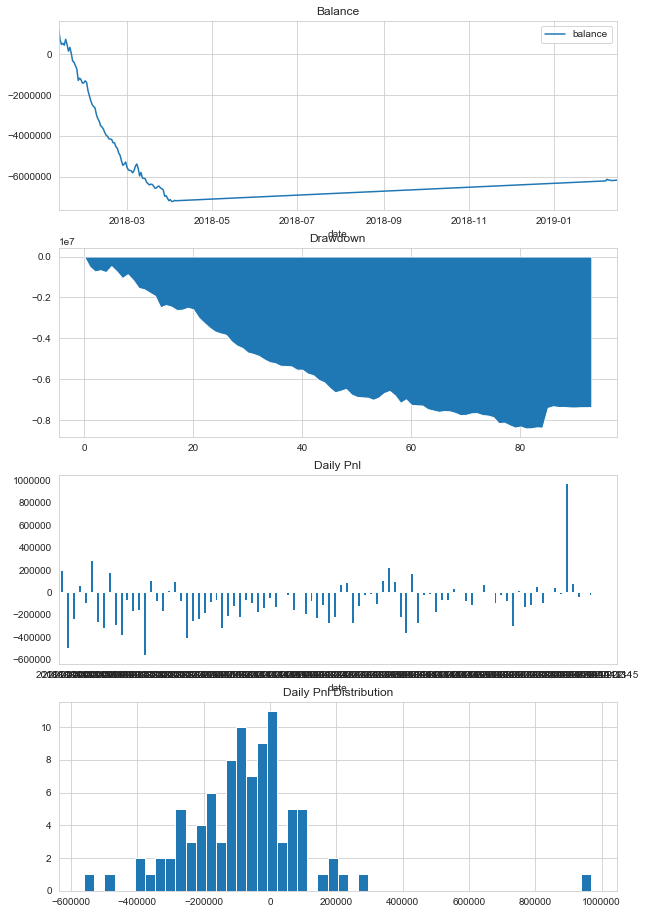

In [3]:
#%%
engine.add_strategy(AtrRsiStrategy, {})
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()